In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('netflix_titles.csv')

In [5]:
data[:5]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [270]:
# Are there notable differences by country?



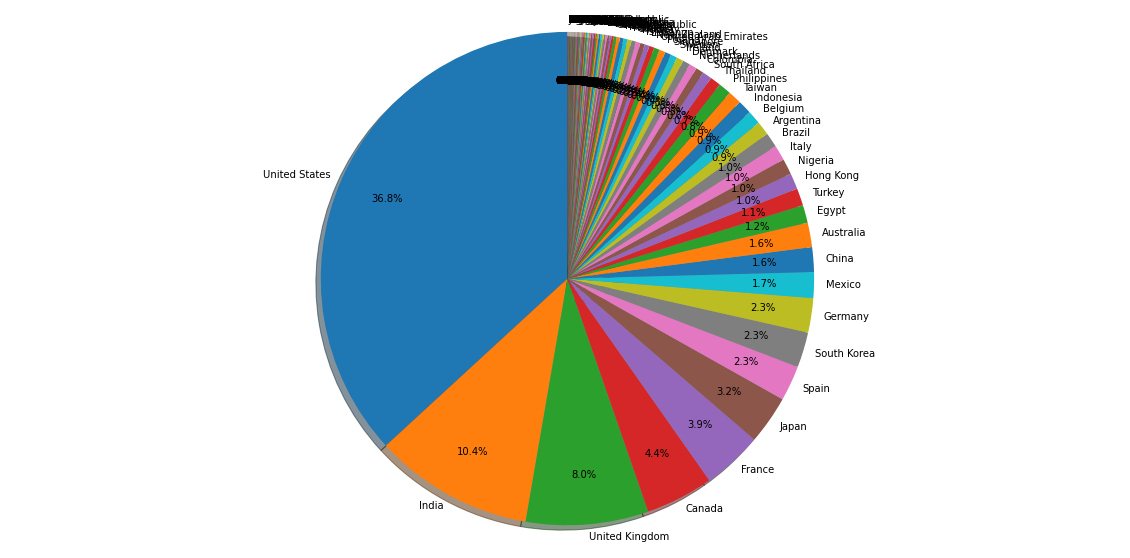

Below shows the percentages of country representation in our dataset


In [269]:
# Exploring representation in dataset by country
dict_freq = {}
for i in data['country']:
    if type(i) is not float:
        split = i.split(', ')
        for i in split:
            if i not in dict_freq:
                dict_freq[i] = 1
            else:
                dict_freq[i] += 1
# print(dict_freq)

dict_freq = dict(sorted(dict_freq.items(), key=lambda item: item[1], reverse=True))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dict_freq.keys()
sizes = dict_freq.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, pctdistance=0.8, labeldistance=1.05)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print("Below shows the percentages of country representation in our dataset")

In [273]:
# From now on, I'm going to focus on the 10 countries with the most entries
lst_countries = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']
print("From here on in dataset, only focus on 10 countries most represented in dataset.")

From here on in dataset, only focus on 10 countries most represented in dataset.


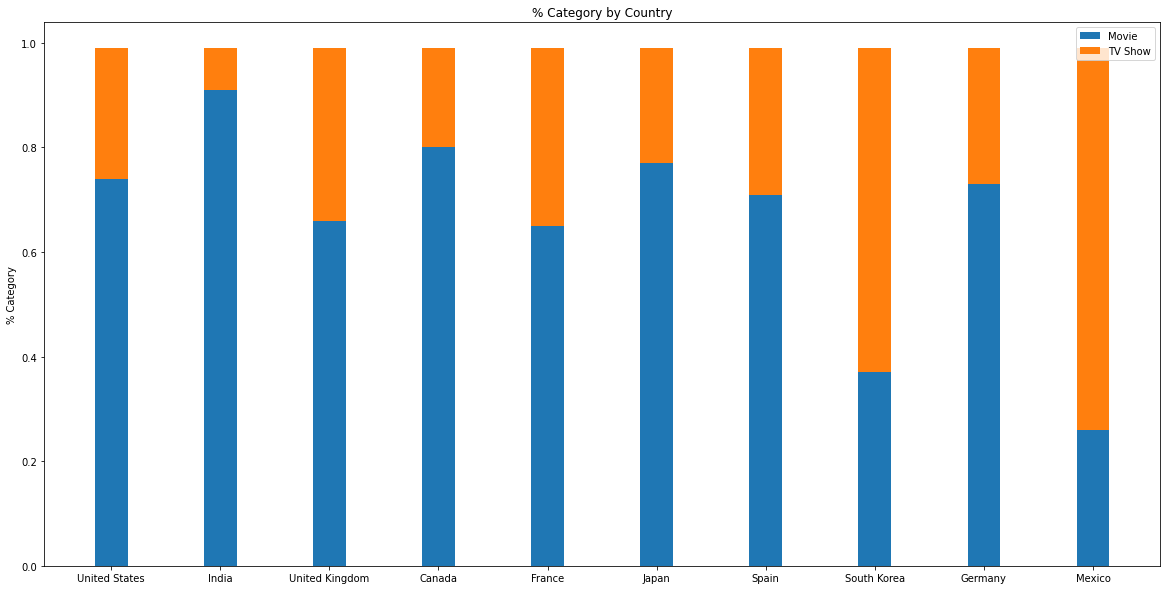

In [271]:
# Country vs. type
dict_freq = {}
for i,j in zip(data['country'],data['type']):
    if type(i) is not float and type(j) is not float:
        split = i.split(', ')
        for each in split:
            if each not in dict_freq:
                dict_freq[each] = {j: 1}
            else:
                # country already exists.
                # current country:
                current_country = dict_freq[each]
                if j not in current_country:
                    current_country[j] = 1
                else:
                    current_country[j] += 1
new_dict = {}
for item,value in dict_freq.items():
    if item in lst_countries:
        new_dict[item] = dict_freq[item]
for i,j in new_dict.items():
    
    total = 0
    for a,b in j.items():
        total += b
    for a,b in j.items():
        j[a] = float(str(b/total)[:4])

# now that I have the data, I need to create a segmented bar graph
labels = lst_countries
movie_means = [j['Movie'] for i,j in new_dict.items()]
tv_means = [j['TV Show'] for i,j in new_dict.items()]
width = 0.3       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, movie_means, width, label='Movie')
ax.bar(labels, tv_means, width,bottom=movie_means,
       label='TV Show')
ax.set_ylabel('% Category')
ax.set_title('% Category by Country')
ax.legend()
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

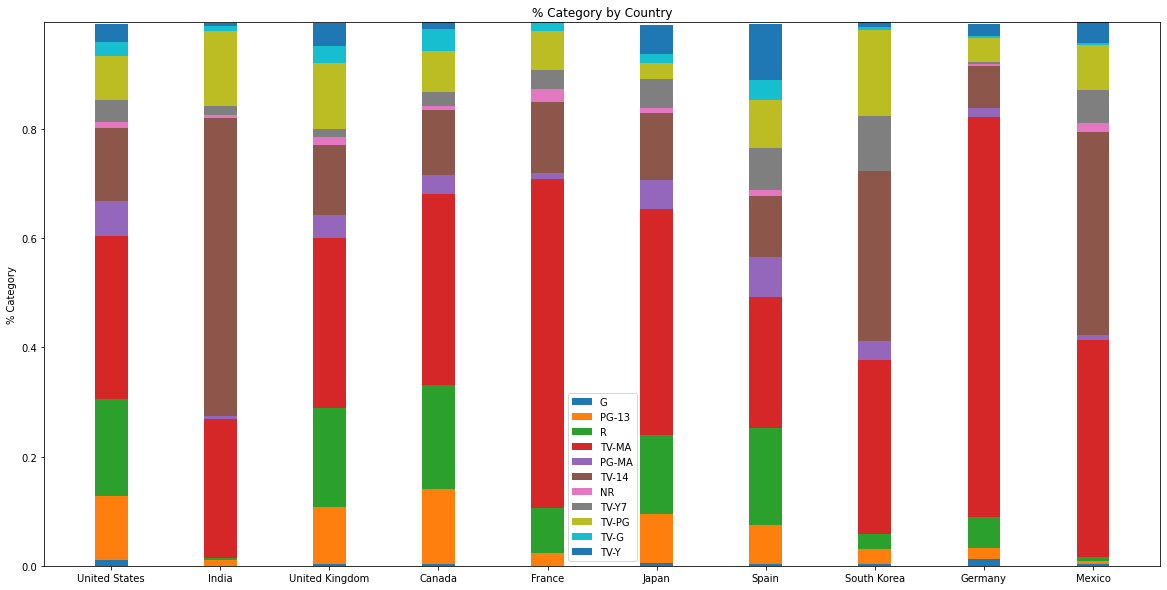

In [275]:
# Country vs. rating
# Country vs. type
dict_freq = {}
for i,j in zip(data['country'],data['rating']):
    if type(i) is not float and type(j) is not float:
        split = i.split(', ')
        for new_i in split:
            if new_i not in dict_freq:
                dict_freq[new_i] = {j: 1}
            else:
                # country already exists.
                # current country:
                current_country = dict_freq[new_i]
                if j not in current_country:
                    current_country[j] = 1
                else:
                    current_country[j] += 1
new_dict = {}
for item,value in dict_freq.items():
    if item in lst_countries:
        new_dict[item] = dict_freq[item]
for i,j in new_dict.items():
    total = 0
    for a,b in j.items():
        total += b
    for a,b in j.items():
        j[a] = float(str(b/total)[:5])

# now that I have the data, I need to create a segmented bar graph
labels = lst_countries
def get_lst(rating):
    lst = []
    for i,j in new_dict.items():
        try:
            lst.append(j[rating])
        except:
            lst.append(0)
    return lst
g_means = np.array(get_lst('G'))
pg_13_means = np.array(get_lst('PG-13'))
r_means = np.array(get_lst('R'))
tv_ma_means = np.array(get_lst('TV-MA'))
pg_means = np.array(get_lst('PG'))
tv_14_means = np.array(get_lst('TV-14'))
nr_means = np.array(get_lst('NR'))
tv_y7 = np.array(get_lst('TV-Y7'))
tv_pg_means = np.array(get_lst('TV-PG'))
tv_g_means = np.array(get_lst('TV-G'))
tv_y_means = np.array(get_lst('TV-Y'))

# print(len(g_means),len(pg_13_means),len(r_means))

width = 0.3       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, g_means, width, label='G')
ax.bar(labels, pg_13_means, width, label='PG-13', bottom=g_means)
ax.bar(labels, r_means, width, label='R', bottom=pg_13_means+g_means)
ax.bar(labels, tv_ma_means, width, label='TV-MA', bottom=r_means+pg_13_means+g_means)
ax.bar(labels, pg_means, width, label='PG-MA', bottom=tv_ma_means+r_means+pg_13_means+g_means)
ax.bar(labels, tv_14_means, width, label='TV-14', bottom=pg_means+tv_ma_means+r_means+pg_13_means+g_means)
ax.bar(labels, nr_means, width, label='NR', bottom=tv_14_means+pg_means+tv_ma_means+r_means+pg_13_means+g_means)
ax.bar(labels, tv_y7, width, label='TV-Y7', bottom=nr_means+tv_14_means+pg_means+tv_ma_means+r_means+pg_13_means+g_means)
ax.bar(labels, tv_pg_means, width, label='TV-PG', bottom=tv_y7+nr_means+tv_14_means+pg_means+tv_ma_means+r_means+pg_13_means+g_means)
ax.bar(labels, tv_g_means, width, label='TV-G', bottom=tv_pg_means+tv_y7+nr_means+tv_14_means+pg_means+tv_ma_means+r_means+pg_13_means+g_means)
ax.bar(labels, tv_y_means, width, label='TV-Y', bottom=tv_g_means+tv_pg_means+tv_y7+nr_means+tv_14_means+pg_means+tv_ma_means+r_means+pg_13_means+g_means)
ax.set_ylabel('% Category')
ax.set_title('% Category by Country')
ax.legend()
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

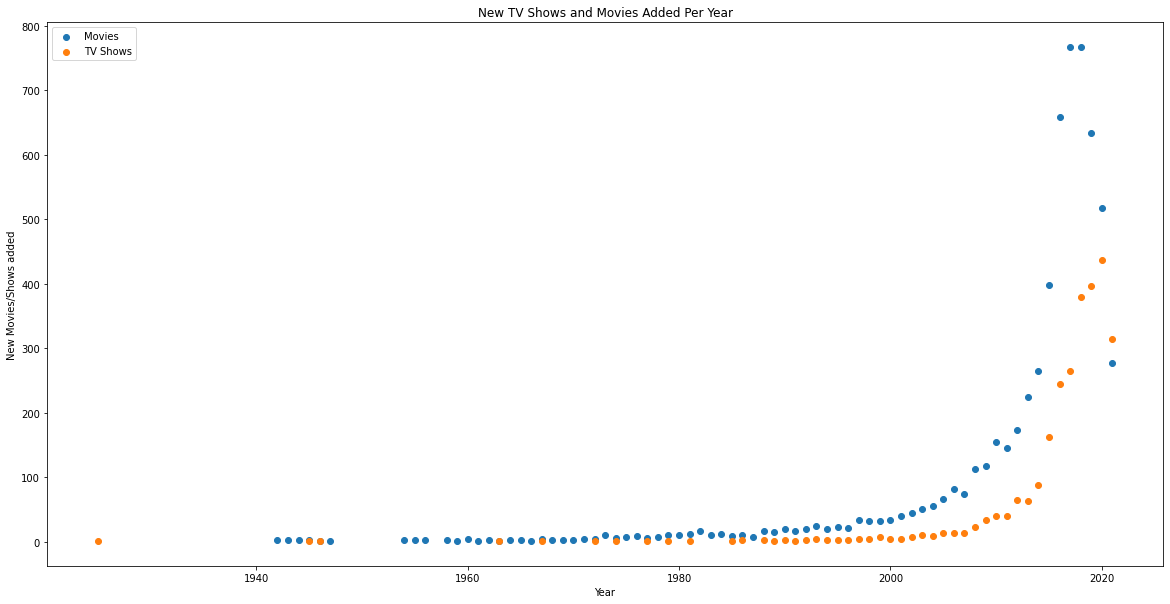

In [268]:
# Is Netflix investing more in TV shows or movies? What trends are there in the length of movies or
# the number of seasons of TV shows?

# number of movies vs number of tv shows per year
movie_freq = {}
show_freq = {}
for year, m_type in zip(data['release_year'],data['type']):
    if m_type == 'Movie':
        # movies
        if year not in movie_freq:
            movie_freq[year] = 1
        else:
            movie_freq[year] += 1
    else:
        # tv shows
        if year not in show_freq:
            show_freq[year] = 1
        else:
            show_freq[year] += 1

plt.title("New TV Shows and Movies Added Per Year")
plt.xlabel("Year")
plt.ylabel("New Movies/Shows added")
plt.scatter(movie_freq.keys(),movie_freq.values(), label="Movies")
plt.scatter(show_freq.keys(),show_freq.values(), label="TV Shows")
plt.legend()

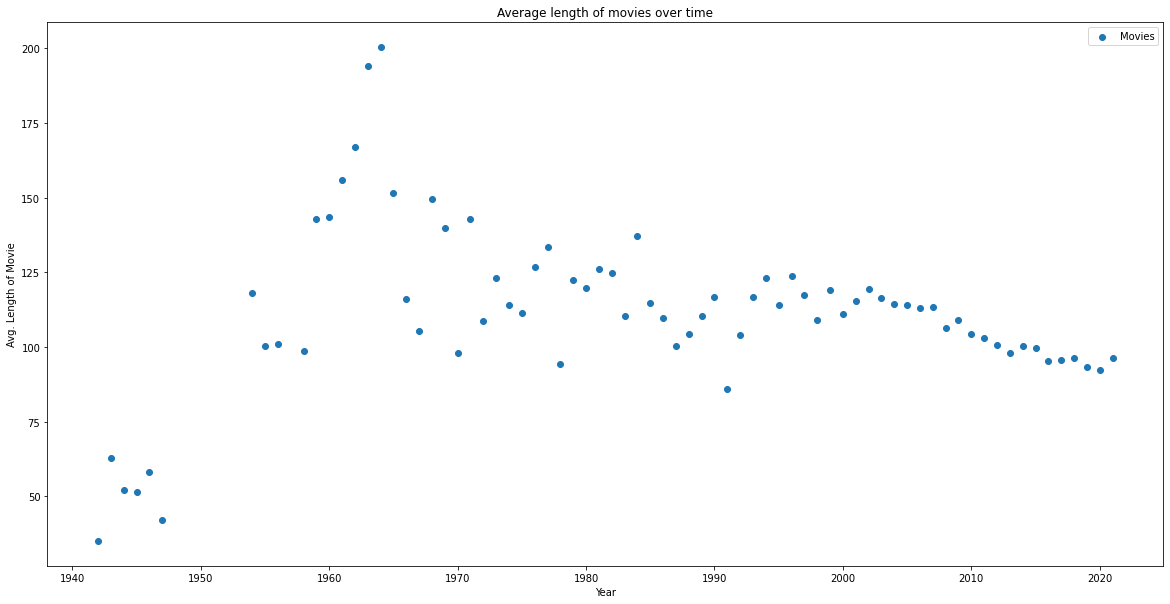

In [266]:
movie_freq = {}
show_freq = {}
for year, m_type, duration in zip(data['release_year'], data['type'], data['duration']):
    if m_type == 'Movie':
        # movies
        try:
            duration_int = int(str(duration)[:-4])
            if year not in movie_freq:
                movie_freq[year] = [duration_int]
            else:
                movie_freq[year].append(duration_int)
        except:
            pass
    else:
        # tv shows
        tv_duration = 0
        if str(duration)[-1] == "s":
            tv_duration = int(str(duration)[:-8])
        else:
            tv_duration = int(str(duration)[:-7])
        if year not in show_freq:
            show_freq[year] = [tv_duration]
        else:
            show_freq[year].append(tv_duration)
for i,j in movie_freq.items():
    movie_freq[i] = np.average(movie_freq[i])
for i,j in show_freq.items():
    show_freq[i] = np.average(show_freq[i])

plt.title("Average length of movies over time")
plt.xlabel("Year")
plt.ylabel("Avg. Length of Movie")
plt.scatter(movie_freq.keys(),movie_freq.values(), label="Movies")
plt.legend()

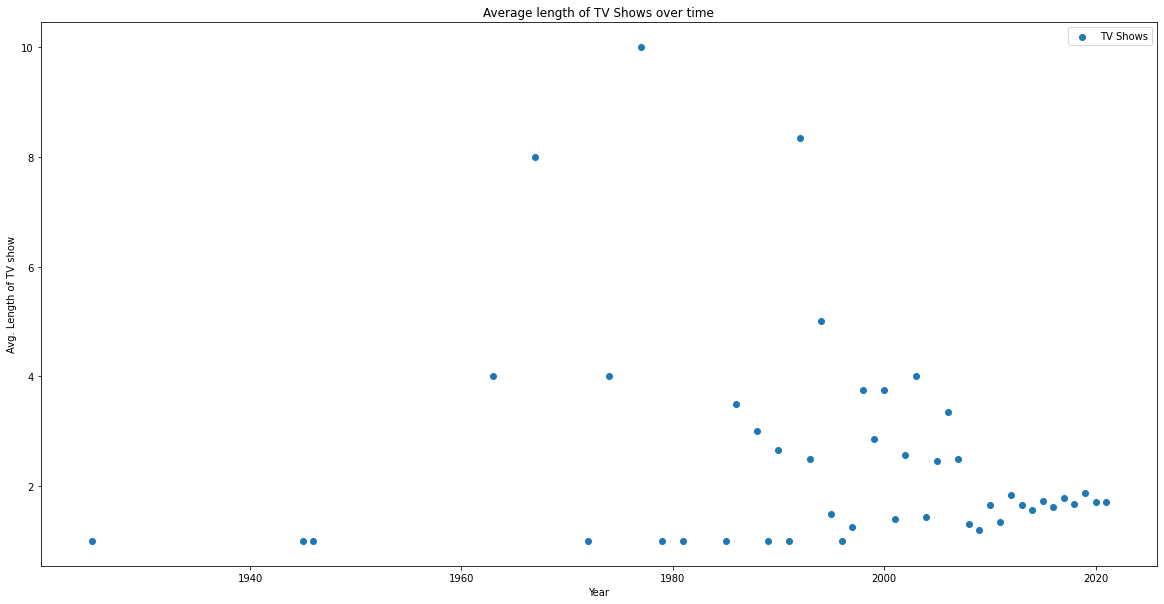

In [267]:
plt.title("Average length of TV Shows over time")
plt.xlabel("Year")
plt.ylabel("Avg. Length of TV show")
plt.scatter(show_freq.keys(),show_freq.values(), label="TV Shows")
plt.legend()

In [192]:
# Are there certain actors or directors that Netflix seems to like?

dict_freq = {}
for i in data['director']:
    if type(i) is not float:
        split = i.split(', ')
        for i in split:
            if i not in dict_freq:
                dict_freq[i] = 1
            else:
                dict_freq[i] += 1
sorted_dict = dict(sorted(dict_freq.items(), key=lambda item: item[1], reverse=True))
print(f"5 Most popular directors in the world:")
print(sorted(dict_freq, key=dict_freq.get, reverse=True)[:5])

5 Most popular directors in world:
['Rajiv Chilaka', 'Jan Suter', 'Raúl Campos', 'Suhas Kadav', 'Marcus Raboy']


In [193]:
dict_freq = {}
for i in data['cast']:
    if type(i) is not float:
        split = i.split(', ')
        for i in split:
            if i not in dict_freq:
                dict_freq[i] = 1
            else:
                dict_freq[i] += 1
sorted_dict = dict(sorted(dict_freq.items(), key=lambda item: item[1], reverse=True))
# print(sorted_dict)
print(f"5 Most popular actors in the world:")
print(sorted(dict_freq, key=dict_freq.get, reverse=True)[:5])

5 Most popular actors in world:
['Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani', 'Naseeruddin Shah', 'Takahiro Sakurai']


In [264]:
dict_freq = {}
for i,j in zip(data['country'],data['cast']):
    if type(i) is not float and type(j) is not float:
        split = i.split(', ')
        for new_i in split:
            for new_j in j.split(', '):
                if new_i not in dict_freq:
                    dict_freq[new_i] = {new_j: 1}
                else:
                    # country already exists.
                    # current country:
                    current_country = dict_freq[new_i]
                    if new_j not in current_country:
                        current_country[new_j] = 1
                    else:
                        current_country[new_j] += 1
print("Code below shows the most popular actor for each country:")
print("Country, Actor, Number of times in show/movie")
for item,value in dict_freq.items():
    sorted_dict = dict(sorted(value.items(), key=lambda item: item[1], reverse=True))
    max_key = max(sorted_dict, key=sorted_dict.get)
    print(f"{item}, {max_key}, {sorted_dict[max_key]}")

Code below shows the most popular actor for each country:
Country, Actor, Number of times in show/movie
South Africa, Deon Lotz, 5
India, Anupam Kher, 40
United States, Samuel L. Jackson, 22
Ghana, Adjetey Anang, 3
Burkina Faso, Kofi Ghanaba, 1
United Kingdom, David Attenborough, 17
Germany, Daniel Brühl, 5
Ethiopia, Kofi Ghanaba, 1
Czech Republic, Anna Fialová, 2
Mexico, Humberto Busto, 6
Turkey, Demet Akbağ, 13
Australia, Sam Neill, 5
France, Benoît Magimel, 5
Finland, Ville Virtanen, 2
China, Donnie Yen, 10
Canada, John Paul Tremblay, 14
Japan, Takahiro Sakurai, 29
Nigeria, Blossom Chukwujekwu, 12
Spain, Mario Casas, 10
Belgium, Matthias Schoenaerts, 4
South Korea, Sung Dong-il, 6
Singapore, Zhang Zhenhuan, 7
Italy, Riccardo Scamarcio, 5
Romania, Flavia Hojda, 2
Argentina, Joaquín Furriel, 5
Venezuela, Joaquín Furriel, 1
Hong Kong, Donnie Yen, 9
Russia, Paulina Andreeva, 3
, Jung Hae-in, 1
Ireland, Barry Keoghan, 3
Nepal, Anmol Limbu, 1
New Zealand, Cohen Holloway, 3
Brazil, Jonatha

In [263]:
dict_freq = {}
for i,j in zip(data['country'],data['director']):
    if type(i) is not float and type(j) is not float:
        split = i.split(', ')
        for new_i in split:
            for new_j in j.split(', '):
                if new_i not in dict_freq:
                    dict_freq[new_i] = {new_j: 1}
                else:
                    # country already exists.
                    # current country:
                    current_country = dict_freq[new_i]
                    if new_j not in current_country:
                        current_country[new_j] = 1
                    else:
                        current_country[new_j] += 1
print("Code below shows the most popular director for each country:")
print("Country, Director, Number of times directed")
for item,value in dict_freq.items():
    sorted_dict = dict(sorted(value.items(), key=lambda item: item[1], reverse=True))
    max_key = max(sorted_dict, key=sorted_dict.get)
    print(f"{item}, {max_key}, {sorted_dict[max_key]}")

Code below shows the most popular director for each country:
Country, Director, Number of times directed
United States, Marcus Raboy, 15
Ghana, Shirley Frimpong-Manso, 2
Burkina Faso, Haile Gerima, 1
United Kingdom, Alastair Fothergill, 4
Germany, Detlev Buck, 5
Ethiopia, Haile Gerima, 1
Czech Republic, Christian Schwochow, 1
India, David Dhawan, 9
France, Thierry Donard, 5
China, Wilson Yip, 5
Canada, Justin G. Dyck, 8
South Africa, Adze Ugah, 3
Japan, Toshiya Shinohara, 7
Nigeria, Kunle Afolayan, 7
Spain, Fernando González Molina, 4
Australia, Clay Glen, 4
Mexico, Jan Suter, 12
Italy, Sergio Leone, 2
Romania, Cristina Jacob, 4
Argentina, Raúl Campos, 5
Venezuela, Sebastián Schindel, 1
Hong Kong, Johnnie To, 8
Nepal, Paakhi Tyrewala, 1
New Zealand, Peter Jackson, 3
Brazil, Lucas Margutti, 3
Greece, Ferdinando Cito Filomarino, 1
Colombia, Fernando Ayllón, 4
Belgium, Raja Gosnell, 2
Switzerland, Jonathan Teplitzky, 1
Taiwan, Weica Wang, 2
Bulgaria, Don Michael Paul, 2
, Najwa Najjar, 1
